### Imports

In [84]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Getting opinions about product from database

In [87]:
print(*[filename.split(".")[0]for filename in os.listdir("./opinions")], sep ="\n")

16007338
17230358
81105423


In [88]:
product_id = input("Please enter product code:")

In [89]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

,opinion_id,author,recommend,stars,content_pl,pros_pl,cons_pl,up_votes,down_votes,published,purchased,content_en,pros_en,cons_en
0,4119789,Bartolini,NaN,5,"Bardzo dobra gitara do nauki. Prosty gryf, str...",[],[],4,0,2016-10-28 22:30:13,2016-10-08 22:11:07,"Very good learning guitar. A straight griffin,...",[],[]
1,15939077,J...6,NaN,4,"Gitara jest piękna, bardzo dobrze wykonana. Pr...","[brzmienie, jakość, wygląd]",[],2,0,2022-04-08 21:58:57,2022-03-13 13:52:04,"The guitar is beautiful, very well made. Befor...","[sound, quality, appearance]",[]
2,10222005,Marcin,NaN,5,Jak na początek nauki dla córki - rewelacja. N...,"[brzmienie, jakość]",[],3,0,2019-03-11 08:15:06,2019-02-07 13:58:06,As for the beginning of science for a daughter...,"[sound, quality]",[]
3,19242156,m...k,NaN,5,Kupiłem gitarę jako prezent dla początkującego...,"[brzmienie, jakość, wygląd]",[oznaczenia progów],0,0,2024-11-28 09:13:03,2024-11-19 12:34:36,I bought a guitar as a gift for a beginner. Th...,"[sound, quality, appearance]",[thresholds]
4,8433857,Robert,NaN,5,Aż nie do do wiary że taki instrument kosztuje...,[],[],2,0,2018-10-11 20:57:13,2018-10-04 22:59:45,It is not to faith that such an instrument cos...,[],[]
5,17430401,t...k,NaN,5,"Gitara brzmi dobrze, jednak przy zakupie zalec...","[brzmienie, jakość, wygląd]",[kiepska jakość strun],0,0,2023-04-21 12:48:04,2023-04-02 15:38:37,"The guitar sounds good, but when buying, I rec...","[sound, quality, appearance]",[poor quality strings]
6,15611497,j...k,NaN,5,"SUPER(!), choć przed muzykowaniem, musiałem tr...","[brzmienie, jakość, wygląd]",[],1,1,2022-01-26 08:36:19,2021-10-24 11:38:00,"Super (!), Although before music, I had to ""sl...","[sound, quality, appearance]",[]
7,8588178,Użytkownik Ceneo,NaN,5,"Towar zgodny z opisem, wygląd gitara z połyski...",[],[],1,0,2018-11-19 21:44:19,2018-11-14 19:32:08,"Goods in accordance with the description, the ...",[],[]
8,14424462,m...l,NaN,5,"Po prostu mi odpowiada, nie mam porównania do ...","[brzmienie, jakość, wygląd]",[],0,0,2021-05-07 16:39:00,2021-05-05 20:27:41,"He just suits me, I don't have a comparison to...","[sound, quality, appearance]",[]
9,19257775,o...a,NaN,5,fajny dla początkujących do nauki gry w przyst...,"[brzmienie, jakość, wygląd]",[],0,0,2024-12-04 08:52:08,2024-11-29 12:14:12,Nice for beginners to learn to play at an affo...,"[sound, quality, appearance]",[]


### Calculating basic statistics


In [90]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum()
average_stars = opinions.stars.mean()
pros_cons_count = opinions.apply(lambda o: bool(o.pros_pl) and bool(o.cons_pl), axis=1).sum()
print(f"Number of opinions about the product : {opinions_count}")
print(f"Number of opinions about the product in which advantages have been listed : {pros_count}")
print(f"Number of opinions about the product in which disadvantages have been listed : {cons_count}")
print(f"Number of opinions about the product in which advantages and disadvantages have been listed : {pros_cons_count}")
print(f"Average score of the product: {average_stars:.2f}")


Number of opinions about the product : 10
Number of opinions about the product in which advantages have been listed : 7
Number of opinions about the product in which disadvantages have been listed : 2
Number of opinions about the product in which advantages and disadvantages have been listed : 2
Average score of the product: 4.90


In [91]:
pros = opinions.pros_en.explode().value_counts()
print(pros)
cons = opinions.cons_en.explode().value_counts()
print(cons)

pros_en
sound         7
quality       7
appearance    6
Name: count, dtype: int64
cons_en
thresholds              1
poor quality strings    1
Name: count, dtype: int64


### Drawing charts

In [92]:
if not os.path.exists("./pie_charts"):
    os.mkdir("./pie_charts")
if not os.path.exists("./bar_charts"):
    os.mkdir("./bar_charts")


In [93]:
recommendations = opinions.recommend.value_counts(dropna=False).reindex([True, False, None], fill_value=0)
recommendations

recommend
True     0
False    0
None     0
Name: count, dtype: int64

In [76]:
recommendations.plot.pie(
    label = "",
    labels = ["Recommend", "Not recommend","No opinion"],
    autopct = lambda r: f"{r:.1f}%" if r>0 else ""

)
plt.title(f"Recommendations for product {product_id}\nTotal number of opinions: {opinions_count}")
plt.savefig(f"./pie_charts/{product_id}.png")
plt.close()

d:\CeneoScraperCS12\CeneoScraperCS12\.venv\Lib\site-packages\matplotlib\axes\_axes.py:3365: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [96]:
stars = opinions.stars.value_counts().reindex(list(np.arange(0.5,5.5,0.5)), fill_value=0)
stars

stars
0.5    0
1.0    0
1.5    0
2.0    0
2.5    0
3.0    0
3.5    0
4.0    1
4.5    0
5.0    9
Name: count, dtype: int64

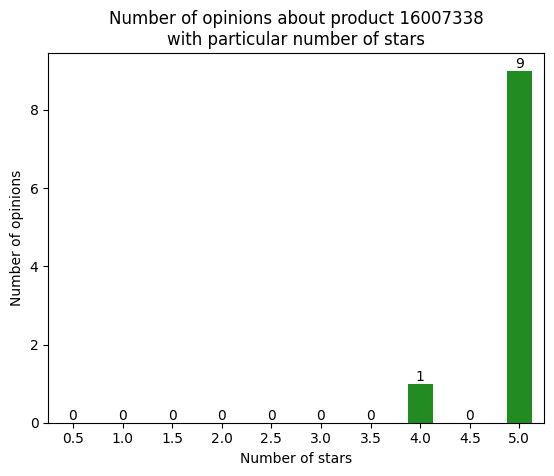

In [101]:
ax = stars.plot.bar(
    color = ["forestgreen" if s>3.5 else "crimson" if s<3 else "steelblue" for s in stars.index]
)
plt.bar_label(container=ax.containers[0])
plt.xlabel("Number of stars")
plt.ylabel("Number of opinions")
plt.title(f"Number of opinions about product {product_id}\nwith particular number of stars")
plt.xticks(rotation=0)
plt.show()
plt.savefig(f"./bar_charts/{product_id}.png")
plt.close()